In [ ]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

## Loading audio files with Librosa

In [2]:
audio_file = "data\hc\hcsegment-0.0.mp3"
ipd.Audio(audio_file)

# load audio files with librosa
scale, sr = librosa.load(audio_file)

## Extracting Short-Time Fourier Transform

In [33]:
FRAME_SIZE = 4096
HOP_SIZE = 1024
S_scale = librosa.stft(scale, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_scale.shape
type(S_scale[0][0])

## Calculating the spectrogram

In [20]:
Y_scale = np.abs(S_scale) ** 2

In [21]:
Y_scale.shape

(2049, 18266)

In [22]:
type(Y_scale[0][0])

numpy.float32

## Visualizing the spectrogram

In [23]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

In [26]:
# plot_spectrogram(Y_scale, sr, HOP_SIZE)

## Log-Amplitude Spectrogram

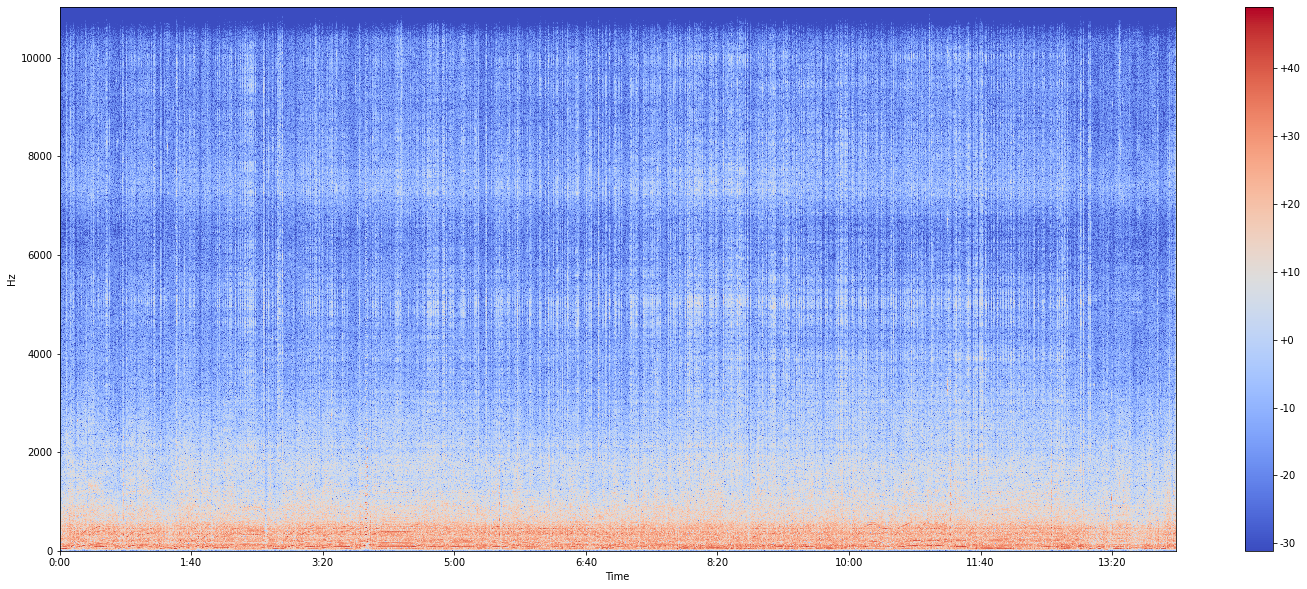

In [25]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

## Log-Frequency Spectrogram

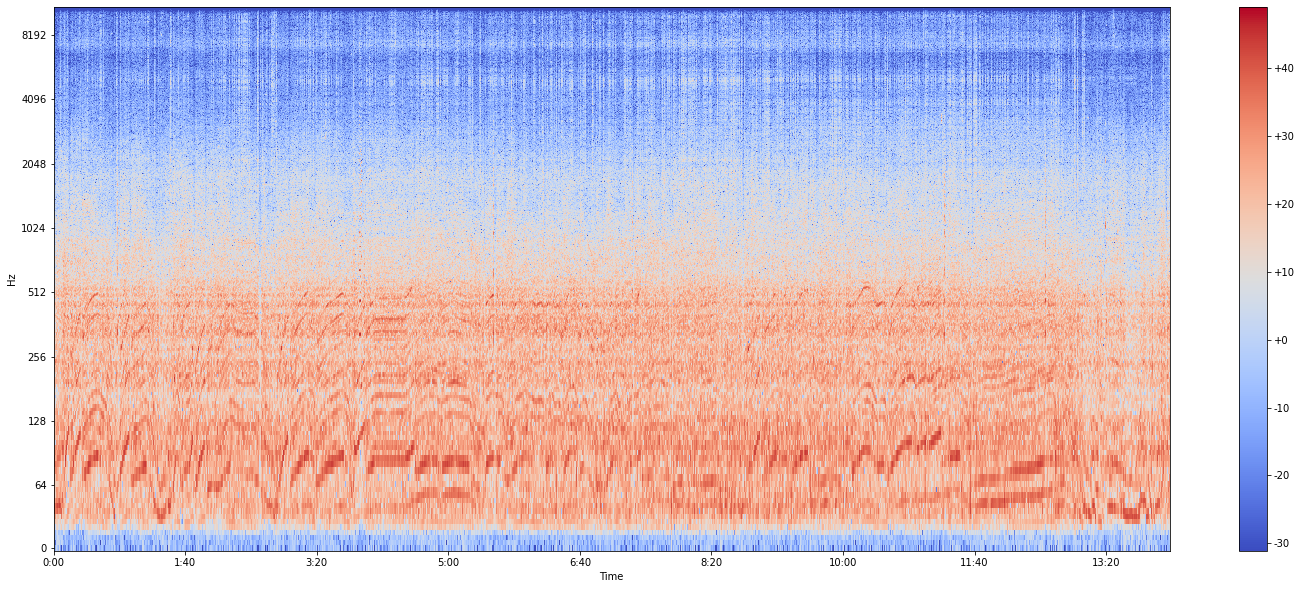

In [36]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")